### Starting up

In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 52.5MB/s]


MobileNetV2(
  (features): Sequential(
    (0): ConvBNActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momen

### A and B

All pre-trained models expect input images normalized in the same way,
i.e. mini-batches of 3-channel RGB images of shape `(3 x H x W)`, where `H` and `W` are expected to be at least `224`.
The images have to be loaded in to a range of `[0, 1]` and then normalized using `mean = [0.485, 0.456, 0.406]`
and `std = [0.229, 0.224, 0.225]`.

Here's a sample execution.

In [ ]:
# Download an example image from the pytorch website
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [ ]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open('images.jpg')

pil = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
])

preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_pil = pil(input_image)
input_tensor = preprocess(input_pil)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([ 2.8939e+00,  9.2129e-01,  1.3664e+01,  1.4704e+01,  1.7288e+01,
         1.1159e+01,  4.8545e+00, -2.1517e+00, -4.6532e+00, -6.6060e+00,
         1.3377e-01, -2.5195e+00, -2.6295e+00, -2.8530e+00, -9.1127e-01,
        -2.5730e+00, -3.0052e+00,  3.8861e-01,  5.2639e-01, -2.9129e+00,
         1.3320e+00,  4.4277e+00, -2.4136e+00, -3.8041e+00, -4.0918e+00,
        -2.2458e+00,  3.3393e+00, -1.4593e+00,  1.2096e-01,  8.5914e+00,
         7.3666e-01, -8.6725e-01,  3.0450e+00,  5.7664e+00,  6.0985e+00,
        -1.1153e+00,  3.6499e-01, -4.1056e+00,  1.2564e+00, -9.0339e-01,
        -1.1354e+00, -5.4445e-01, -1.0327e+00,  1.3489e+00, -1.5856e-01,
        -3.0208e+00, -1.6626e+00,  1.8781e+00, -2.4068e+00, -3.0712e+00,
        -3.0257e-01,  7.0322e+00, -1.8780e+00, -2.0317e+00, -9.8714e-01,
        -3.6754e+00, -7.0592e+00, -6.3670e+00, -2.4716e+00, -1.0011e+00,
        -1.9421e+00, -5.1210e+00, -8.7538e-01, -3.5742e+00, -9.3335e-01,
         2.8822e+00, -7.9344e-01, -3.7647e+00, -3.9

In [ ]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2023-05-11 13:12:28--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2023-05-11 13:12:28 (58.8 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [ ]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

hammerhead 0.8997508883476257
tiger shark 0.06790422648191452
great white shark 0.02400331012904644
electric ray 0.0019615560304373503
dugong 0.0017026277491822839


# C (Setting up LIME)

In [ ]:
def batch_predict(images):
    model.eval()
    batch = torch.stack(tuple(preprocess(i) for i in images), dim=0)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    batch = batch.to(device)
    
    logits = model(batch)
    probs = torch.nn.functional.softmax(logits, dim=1)
    return probs.detach().cpu().numpy()

In [ ]:
test_pred = batch_predict([pil(input_image)])
categories[test_pred.squeeze().argmax()]

tensor([[ 2.8939e+00,  9.2129e-01,  1.3664e+01,  1.4704e+01,  1.7288e+01,
          1.1159e+01,  4.8545e+00, -2.1517e+00, -4.6532e+00, -6.6060e+00,
          1.3377e-01, -2.5195e+00, -2.6295e+00, -2.8530e+00, -9.1127e-01,
         -2.5730e+00, -3.0052e+00,  3.8861e-01,  5.2639e-01, -2.9129e+00,
          1.3320e+00,  4.4277e+00, -2.4136e+00, -3.8041e+00, -4.0918e+00,
         -2.2458e+00,  3.3393e+00, -1.4593e+00,  1.2096e-01,  8.5914e+00,
          7.3666e-01, -8.6725e-01,  3.0450e+00,  5.7664e+00,  6.0985e+00,
         -1.1153e+00,  3.6499e-01, -4.1056e+00,  1.2564e+00, -9.0339e-01,
         -1.1354e+00, -5.4445e-01, -1.0327e+00,  1.3489e+00, -1.5856e-01,
         -3.0208e+00, -1.6626e+00,  1.8781e+00, -2.4068e+00, -3.0712e+00,
         -3.0257e-01,  7.0322e+00, -1.8780e+00, -2.0317e+00, -9.8714e-01,
         -3.6754e+00, -7.0592e+00, -6.3670e+00, -2.4716e+00, -1.0011e+00,
         -1.9421e+00, -5.1210e+00, -8.7538e-01, -3.5742e+00, -9.3335e-01,
          2.8822e+00, -7.9344e-01, -3.

'hammerhead'

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=eeddb42260988c6817064d7fd0f06ebd107f7a2b0eb79f420a29dc4545c4731b
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime import lime_image
import numpy as np

In [ ]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(np.array(pil(input_image)), 
                                         batch_predict, # classification function
                                         top_labels=5, 
                                         hide_color=0, 
                                         num_samples=100) 

  0%|          | 0/100 [00:00<?, ?it/s]

# D (Boundaries)

In [ ]:
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

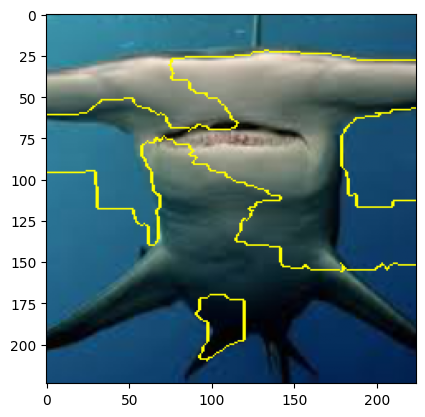

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=False)
img_boundry1 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry1)

# E (Pros and Cons)

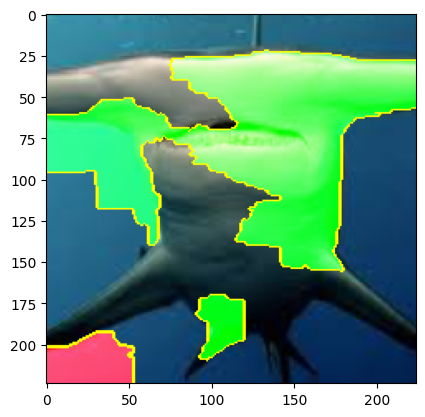

In [ ]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)


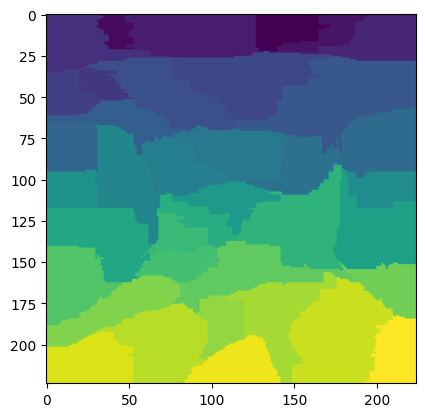

In [ ]:
plt.imshow(explanation.segments)

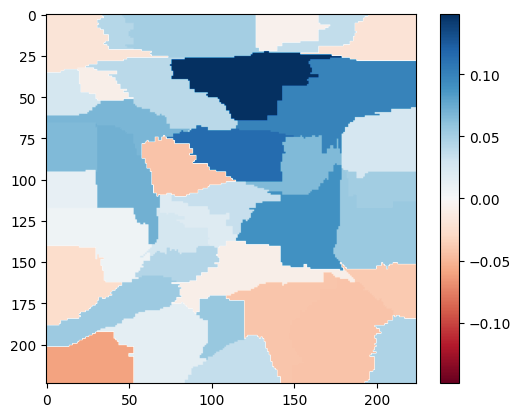

In [ ]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()

# For other images

In [ ]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(np.array(pil(input_image)), 
                                         batch_predict, # classification function
                                         top_labels=5, 
                                         hide_color=0, 
                                         num_samples=100) 

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=False)
img_boundry1 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry1)

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

plt.imshow(explanation.segments)

ind =  explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()